In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
data = pd.read_csv(r'C:\Users\Alawakey\Desktop\ML Projects\Student Performance\data\Student_Performance.csv')
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [146]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


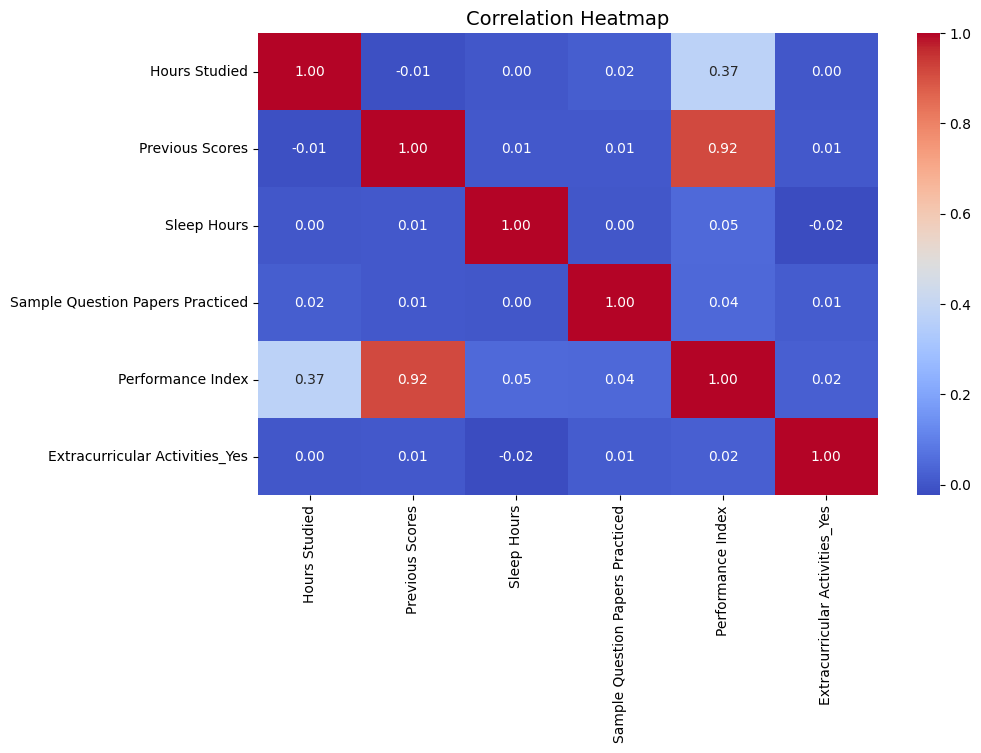

In [148]:
df_encoded = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [149]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [150]:
categorical_data = ['Extracurricular Activities']

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_data)],
    remainder='passthrough'
)

x = np.array(ct.fit_transform(x))

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [152]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [153]:
y_predict = model.predict(x_test)

In [154]:
mse = mean_squared_error(y_test, y_predict)
mse

4.082628398521857

In [155]:
rmse = np.sqrt(mse)
rmse

2.0205515085050063

In [156]:
r2_score = r2_score(y_test, y_predict)
print(f"{r2_score:.2f}%")

0.99%


In [157]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(train_score)
print(test_score)

0.9886898790682355
0.9889832909573145


In [158]:
joblib.dump(model, 'student_performance_model.pkl')

['student_performance_model.pkl']

In [159]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib

data = pd.read_csv('Student_Performance.csv')
load_model = joblib.load('student_performance_model.pkl')

x_full = data.iloc[:, :-1]

categorical_data=['Extracurricular Activities']

ct = ColumnTransformer(
    transformers=[
        ('encode', OneHotEncoder(drop='first'), categorical_data)
    ],
    remainder='passthrough'
)

ct.fit(x_full)

sample_data = pd.DataFrame(
    [
        {
            'Hours Studied': 7,
            'Previous Scores': 95,
            'Extracurricular Activities': 'Yes',
            'Sleep Hours': 7,
            'Sample Question Papers Practiced': 2
        }
    ]
)

transformed_data = ct.transform(sample_data)

prediction = loaded_model.predict(transformed_data)
print(f'prediction: {prediction[0]:.2f}')

prediction: 86.99


# Using pipeline

#### More Clean + Readable + Production Level

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [161]:
data = pd.read_csv('Student_Performance.csv')
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [162]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [163]:
categorical_cols = ['Extracurricular Activities']

pipeline = Pipeline(steps=[
    ('preprocess', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), categorical_cols)
        ],
        remainder='passthrough'
    )),
    ('model', LinearRegression())
])

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [165]:
pipeline.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [166]:
y_predict = pipeline.predict(x_test)

In [167]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(mse)
print(rmse)
print(r2)

4.082628398521857
2.0205515085050063
0.9889832909573145


In [168]:
joblib.dump(pipeline, 'student_performance_pipeline.pkl')

['student_performance_pipeline.pkl']

In [173]:
model_pip = joblib.load('student_performance_pipeline.pkl')

new_sample = pd.DataFrame([{
    'Hours Studied': 7,
    'Previous Scores': 95,
    'Extracurricular Activities': 'Yes',
    'Sleep Hours': 7,
    'Sample Question Papers Practiced': 2
}])

predictions = model_pip.predict(new_sample)
print("Predicted performance:", predictions[0])

Predicted performance: 86.99019014529159
